In [1]:
# To help you get started...
from IPython.display import display
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
from scipy.stats import scoreatpercentile
import math
from sklearn.preprocessing import minmax_scale
%matplotlib inline 

In [2]:
df0 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_0.csv',index_col=0)
df1 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_1.csv',index_col=0)
df2 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_2.csv',index_col=0)
df3 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_3.csv',index_col=0)
df4 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_4.csv',index_col=0)
df5 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_5.csv',index_col=0)
df6 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_6.csv',index_col=0)
df7 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_7.csv',index_col=0)
df8 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_8.csv',index_col=0)
df9 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_9.csv',index_col=0)
df10 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_10.csv',index_col=0)
df11 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_11.csv',index_col=0)
df12 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_12.csv',index_col=0)
df13 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_13.csv',index_col=0)
df14 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_14.csv',index_col=0)
df15 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_15.csv',index_col=0)
df16 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_16.csv',index_col=0)
df17 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_17.csv',index_col=0)
df18 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_18.csv',index_col=0)
df19 = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_19.csv',index_col=0)

# Reframing all the dataframes in an understandable way

In [3]:
df2['Date_created']=df2.index
df2=df2.reset_index(drop=True)
df2.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df2.columns)
cols = [cols[-1]] + cols[:-1]
df2 = df2[cols]

# Outlier Removal using standard deviation

In [4]:
df2=df2[abs(df2.sensor1-df2.sensor1.mean()) <= (3*df2.sensor1.std())]
df2=df2[abs(df2.sensor2-df2.sensor2.mean()) <= (3*df2.sensor2.std())]
df2=df2[abs(df2.sensor3-df2.sensor3.mean()) <= (3*df2.sensor3.std())]
df2=df2[abs(df2.sensor4-df2.sensor4.mean()) <= (3*df2.sensor4.std())]

In [5]:
df2=df2.reset_index(drop=True)
df2['Date_created'] = pd.to_datetime(df2['Date_created'], errors='coerce')
df2['day_of_week'] = df2['Date_created'].dt.dayofweek
df2['month'] = pd.DatetimeIndex(df2['Date_created']).month
df2['hour'] = pd.DatetimeIndex(df2['Date_created']).hour

Standardizing the data using minmax_scale

In [6]:
df2[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df2[['sensor1','sensor2','sensor3','sensor4']])

we use the moving variance to approximate the variation in the series at a point in time

In [7]:
df2['sensor1']=df2['sensor1'].rolling(window=30).var()
df2['sensor2']=df2['sensor2'].rolling(window=30).var()
df2['sensor3']=df2['sensor3'].rolling(window=30).var()
df2['sensor4']=df2['sensor4'].rolling(window=30).var()

Check when the machine is getting failed and remove the extra data

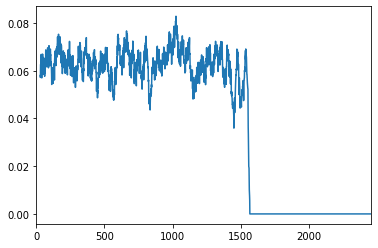

In [8]:
df2['sensor3'].plot()

let us take the data till 1600 so that we can think after the machine is completely dead

In [9]:
df2=df2[:1600]
df2=df2.fillna(df2.mean())
df2_sensor1=pd.DataFrame(data=df2['sensor3'])

To use supervised learning methods, we define an anomaly flag, to equal True if an observation lies outside of Tukey’s hinges across the sensor values.The anomaly flag is used to flag abnormal behaviour in the sensors

In [10]:
tukey_hinge=df2_sensor1.quantile(0.75)
df2_sensor1['labels']=df2_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)

We fit a classification model to classify labels as predictors. Given that the predictors are sequence data, we consider the use of recurrent neural network (RNN) models for classifying anomalies. Traditional RNN units are unable to remember long-term dependencies and susceptible to the vanishing gradient problem, and for this purpose LSTM units may be more suitable

In [11]:
def create_dataset(df2_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df2_sensor1)-look_back-1):
        a = df2_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df2_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)

Constructig Dataframe

In [12]:
values=create_dataset(df2_sensor1,look_back=10)
df_sensor1=pd.DataFrame(data=values[0])
df_sensor1['labels']=pd.DataFrame(data=values[1])
df2_sensor1_final=df_sensor1
df2_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0
1,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0
2,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0
3,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0
4,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0.061145,0


The exact same procedure follows for all the remaining 18 machines and 1st machine dataset can be verified for test set

In [13]:
df3['Date_created']=df3.index
df3=df3.reset_index(drop=True)
df3.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df3.columns)
cols = [cols[-1]] + cols[:-1]
df3 = df3[cols]
df3=df3[abs(df3.sensor1-df3.sensor1.mean()) <= (3*df3.sensor1.std())]
df3=df3[abs(df3.sensor2-df3.sensor2.mean()) <= (3*df3.sensor2.std())]
df3=df3[abs(df3.sensor3-df3.sensor3.mean()) <= (3*df3.sensor3.std())]
df3=df3[abs(df3.sensor4-df3.sensor4.mean()) <= (3*df3.sensor4.std())]
df3=df3.reset_index(drop=True)
df3['Date_created'] = pd.to_datetime(df3['Date_created'], errors='coerce')
df3['day_of_week'] = df3['Date_created'].dt.dayofweek
df3['month'] = pd.DatetimeIndex(df3['Date_created']).month
df3['hour'] = pd.DatetimeIndex(df3['Date_created']).hour
df3[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df3[['sensor1','sensor2','sensor3','sensor4']])
df3['sensor1']=df3['sensor1'].rolling(window=30).var()
df3['sensor2']=df3['sensor2'].rolling(window=30).var()
df3['sensor3']=df3['sensor3'].rolling(window=30).var()
df3['sensor4']=df3['sensor4'].rolling(window=30).var()

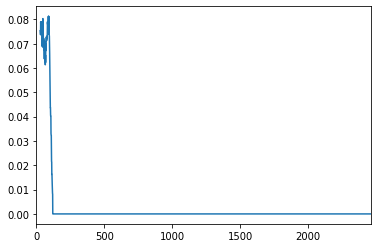

In [14]:
df3['sensor3'].plot()

In [15]:
df3=df3[:130]
df3=df3.fillna(df3.mean())
df3_sensor1=pd.DataFrame(data=df3['sensor3'])
tukey_hinge=df3_sensor1.quantile(0.75)
df3_sensor1['labels']=df3_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df3_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df3_sensor1)-look_back-1):
        a = df3_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df3_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df3_sensor1,look_back=10)
df3_sensor1_final=pd.DataFrame(data=values[0])
df3_sensor1_final['labels']=pd.DataFrame(data=values[1])
df3_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0
1,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0
2,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0
3,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0
4,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0.057067,0


In [16]:
df4['Date_created']=df4.index
df4=df4.reset_index(drop=True)
df4.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df4.columns)
cols = [cols[-1]] + cols[:-1]
df4 = df4[cols]
df4=df4[abs(df4.sensor1-df4.sensor1.mean()) <= (3*df4.sensor1.std())]
df4=df4[abs(df4.sensor2-df4.sensor2.mean()) <= (3*df4.sensor2.std())]
df4=df4[abs(df4.sensor3-df4.sensor3.mean()) <= (3*df4.sensor3.std())]
df4=df4[abs(df4.sensor4-df4.sensor4.mean()) <= (3*df4.sensor4.std())]
df4=df4.reset_index(drop=True)
df4['Date_created'] = pd.to_datetime(df4['Date_created'], errors='coerce')
df4['day_of_week'] = df4['Date_created'].dt.dayofweek
df4['month'] = pd.DatetimeIndex(df4['Date_created']).month
df4['hour'] = pd.DatetimeIndex(df4['Date_created']).hour
df4[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df4[['sensor1','sensor2','sensor3','sensor4']])
df4['sensor1']=df4['sensor1'].rolling(window=30).var()
df4['sensor2']=df4['sensor2'].rolling(window=30).var()
df4['sensor3']=df4['sensor3'].rolling(window=30).var()
df4['sensor4']=df4['sensor4'].rolling(window=30).var()

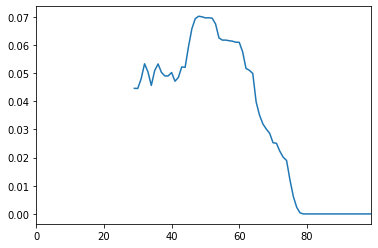

In [17]:
df4['sensor3'][:100].plot()

In [18]:
df4=df4[:80]
df4=df4.fillna(df4.mean())
df4_sensor1=pd.DataFrame(data=df4['sensor3'])
tukey_hinge=df4_sensor1.quantile(0.75)
df4_sensor1['labels']=df4_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df4_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df4_sensor1)-look_back-1):
        a = df4_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df4_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df4_sensor1,look_back=10)
df4_sensor1_final=pd.DataFrame(data=values[0])
df4_sensor1_final['labels']=pd.DataFrame(data=values[1])
df4_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0
1,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0
2,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0
3,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0
4,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0.045847,0


In [19]:
df5['Date_created']=df5.index
df5=df5.reset_index(drop=True)
df5.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df5.columns)
cols = [cols[-1]] + cols[:-1]
df5 = df5[cols]
df5=df5[abs(df5.sensor1-df5.sensor1.mean()) <= (3*df5.sensor1.std())]
df5=df5[abs(df5.sensor2-df5.sensor2.mean()) <= (3*df5.sensor2.std())]
df5=df5[abs(df5.sensor3-df5.sensor3.mean()) <= (3*df5.sensor3.std())]
df5=df5[abs(df5.sensor4-df5.sensor4.mean()) <= (3*df5.sensor4.std())]
df5=df5.reset_index(drop=True)
df5['Date_created'] = pd.to_datetime(df5['Date_created'], errors='coerce')
df5['day_of_week'] = df5['Date_created'].dt.dayofweek
df5['month'] = pd.DatetimeIndex(df5['Date_created']).month
df5['hour'] = pd.DatetimeIndex(df5['Date_created']).hour
df5[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df5[['sensor1','sensor2','sensor3','sensor4']])
df5['sensor1']=df5['sensor1'].rolling(window=30).var()
df5['sensor2']=df5['sensor2'].rolling(window=30).var()
df5['sensor3']=df5['sensor3'].rolling(window=30).var()
df5['sensor4']=df5['sensor4'].rolling(window=30).var()

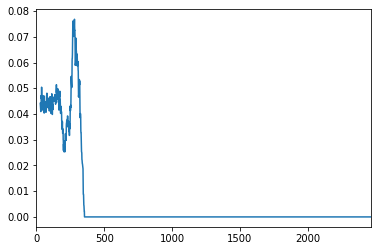

In [20]:
df5['sensor3'].plot()

In [21]:
df5=df5[:370]
df5=df5.fillna(df5.mean())
df5_sensor1=pd.DataFrame(data=df5['sensor3'])
tukey_hinge=df5_sensor1.quantile(0.75)
df5_sensor1['labels']=df5_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df5_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df5_sensor1)-look_back-1):
        a = df5_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df5_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df5_sensor1,look_back=10)
df5_sensor1_final=pd.DataFrame(data=values[0])
df5_sensor1_final['labels']=pd.DataFrame(data=values[1])
df5_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0
1,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0
2,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0
3,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0
4,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0.041574,0


In [22]:
df6['Date_created']=df6.index
df6=df6.reset_index(drop=True)
df6.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df6.columns)
cols = [cols[-1]] + cols[:-1]
df6 = df6[cols]
df6=df6[abs(df6.sensor1-df6.sensor1.mean()) <= (3*df6.sensor1.std())]
df6=df6[abs(df6.sensor2-df6.sensor2.mean()) <= (3*df6.sensor2.std())]
df6=df6[abs(df6.sensor3-df6.sensor3.mean()) <= (3*df6.sensor3.std())]
df6=df6[abs(df6.sensor4-df6.sensor4.mean()) <= (3*df6.sensor4.std())]
df6=df6.reset_index(drop=True)
df6['Date_created'] = pd.to_datetime(df6['Date_created'], errors='coerce')
df6['day_of_week'] = df6['Date_created'].dt.dayofweek
df6['month'] = pd.DatetimeIndex(df6['Date_created']).month
df6['hour'] = pd.DatetimeIndex(df6['Date_created']).hour
df6[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df6[['sensor1','sensor2','sensor3','sensor4']])
df6['sensor1']=df6['sensor1'].rolling(window=30).var()
df6['sensor2']=df6['sensor2'].rolling(window=30).var()
df6['sensor3']=df6['sensor3'].rolling(window=30).var()
df6['sensor4']=df6['sensor4'].rolling(window=30).var()

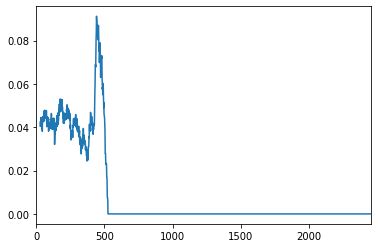

In [23]:
df6['sensor3'].plot()

In [24]:
df6=df6[:550]
df6=df6.fillna(df6.mean())
df6_sensor1=pd.DataFrame(data=df6['sensor3'])
tukey_hinge=df6_sensor1.quantile(0.75)
df6_sensor1['labels']=df6_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df6_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df6_sensor1)-look_back-1):
        a = df6_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df6_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df6_sensor1,look_back=10)
df6_sensor1_final=pd.DataFrame(data=values[0])
df6_sensor1_final['labels']=pd.DataFrame(data=values[1])
df6_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0
1,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0
2,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0
3,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0
4,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0.042249,0


In [25]:
df7['Date_created']=df7.index
df7=df7.reset_index(drop=True)
df7.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df7.columns)
cols = [cols[-1]] + cols[:-1]
df7 = df7[cols]
df7=df7[abs(df7.sensor1-df7.sensor1.mean()) <= (3*df7.sensor1.std())]
df7=df7[abs(df7.sensor2-df7.sensor2.mean()) <= (3*df7.sensor2.std())]
df7=df7[abs(df7.sensor3-df7.sensor3.mean()) <= (3*df7.sensor3.std())]
df7=df7[abs(df7.sensor4-df7.sensor4.mean()) <= (3*df7.sensor4.std())]
df7=df7.reset_index(drop=True)
df7['Date_created'] = pd.to_datetime(df7['Date_created'], errors='coerce')
df7['day_of_week'] = df7['Date_created'].dt.dayofweek
df7['month'] = pd.DatetimeIndex(df7['Date_created']).month
df7['hour'] = pd.DatetimeIndex(df7['Date_created']).hour
df7[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df7[['sensor1','sensor2','sensor3','sensor4']])
df7['sensor1']=df7['sensor1'].rolling(window=30).var()
df7['sensor2']=df7['sensor2'].rolling(window=30).var()
df7['sensor3']=df7['sensor3'].rolling(window=30).var()
df7['sensor4']=df7['sensor4'].rolling(window=30).var()

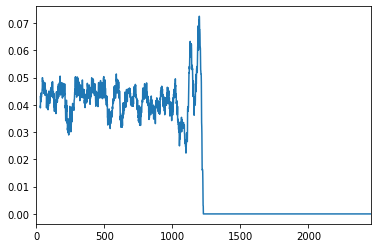

In [26]:
df7['sensor3'].plot()

In [27]:
df7=df7[:1300]
df7=df7.fillna(df7.mean())
df7_sensor1=pd.DataFrame(data=df7['sensor3'])
tukey_hinge=df7_sensor1.quantile(0.75)
df7_sensor1['labels']=df7_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df7_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df7_sensor1)-look_back-1):
        a = df7_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df7_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df7_sensor1,look_back=10)
df7_sensor1_final=pd.DataFrame(data=values[0])
df7_sensor1_final['labels']=pd.DataFrame(data=values[1])
df7_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0
1,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0
2,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0
3,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0
4,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0.039599,0


In [29]:
df8['Date_created']=df8.index
df8=df8.reset_index(drop=True)
df8.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df8.columns)
cols = [cols[-1]] + cols[:-1]
df8 = df8[cols]
df8=df8[abs(df8.sensor1-df8.sensor1.mean()) <= (3*df8.sensor1.std())]
df8=df8[abs(df8.sensor2-df8.sensor2.mean()) <= (3*df8.sensor2.std())]
df8=df8[abs(df8.sensor3-df8.sensor3.mean()) <= (3*df8.sensor3.std())]
df8=df8[abs(df8.sensor4-df8.sensor4.mean()) <= (3*df8.sensor4.std())]
df8=df8.reset_index(drop=True)
df8['Date_created'] = pd.to_datetime(df8['Date_created'], errors='coerce')
df8['day_of_week'] = df8['Date_created'].dt.dayofweek
df8['month'] = pd.DatetimeIndex(df8['Date_created']).month
df8['hour'] = pd.DatetimeIndex(df8['Date_created']).hour
df8[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df8[['sensor1','sensor2','sensor3','sensor4']])
df8['sensor1']=df8['sensor1'].rolling(window=30).var()
df8['sensor2']=df8['sensor2'].rolling(window=30).var()
df8['sensor3']=df8['sensor3'].rolling(window=30).var()
df8['sensor4']=df8['sensor4'].rolling(window=30).var()

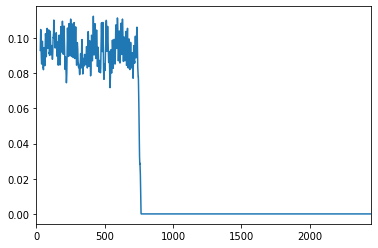

In [459]:
df8['sensor3'].plot()

In [30]:
df8=df8[:900]
df8=df8.fillna(df8.mean())
df8_sensor1=pd.DataFrame(data=df8['sensor3'])
tukey_hinge=df8_sensor1.quantile(0.75)
df8_sensor1['labels']=df8_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df8_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df8_sensor1)-look_back-1):
        a = df8_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df8_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df8_sensor1,look_back=10)
df8_sensor1_final=pd.DataFrame(data=values[0])
df8_sensor1_final['labels']=pd.DataFrame(data=values[1])
df8_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,1
1,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,1
2,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,1
3,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,1
4,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,0.004124,1


In [31]:
df9['Date_created']=df9.index
df9=df9.reset_index(drop=True)
df9.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df9.columns)
cols = [cols[-1]] + cols[:-1]
df9 = df9[cols]
df9=df9[abs(df9.sensor1-df9.sensor1.mean()) <= (3*df9.sensor1.std())]
df9=df9[abs(df9.sensor2-df9.sensor2.mean()) <= (3*df9.sensor2.std())]
df9=df9[abs(df9.sensor3-df9.sensor3.mean()) <= (3*df9.sensor3.std())]
df9=df9[abs(df9.sensor4-df9.sensor4.mean()) <= (3*df9.sensor4.std())]
df9=df9.reset_index(drop=True)
df9['Date_created'] = pd.to_datetime(df9['Date_created'], errors='coerce')
df9['day_of_week'] = df9['Date_created'].dt.dayofweek
df9['month'] = pd.DatetimeIndex(df9['Date_created']).month
df9['hour'] = pd.DatetimeIndex(df9['Date_created']).hour
df9[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df9[['sensor1','sensor2','sensor3','sensor4']])
df9['sensor1']=df9['sensor1'].rolling(window=30).var()
df9['sensor2']=df9['sensor2'].rolling(window=30).var()
df9['sensor3']=df9['sensor3'].rolling(window=30).var()
df9['sensor4']=df9['sensor4'].rolling(window=30).var()

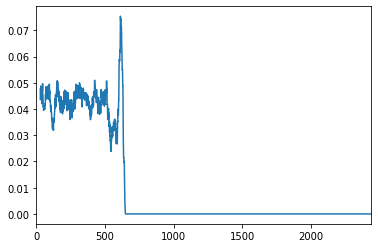

In [32]:
df9['sensor3'].plot()

In [33]:
df9=df9[:750]
df9=df9.fillna(df9.mean())
df9_sensor1=pd.DataFrame(data=df9['sensor3'])
tukey_hinge=df9_sensor1.quantile(0.75)
df9_sensor1['labels']=df9_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df9_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df9_sensor1)-look_back-1):
        a = df9_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df9_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df9_sensor1,look_back=10)
df9_sensor1_final=pd.DataFrame(data=values[0])
df9_sensor1_final['labels']=pd.DataFrame(data=values[1])
df9_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0
1,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0
2,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0
3,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0
4,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0.036288,0


In [34]:
df10['Date_created']=df10.index
df10=df10.reset_index(drop=True)
df10.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df10.columns)
cols = [cols[-1]] + cols[:-1]
df10 = df10[cols]
df10=df10[abs(df10.sensor1-df10.sensor1.mean()) <= (3*df10.sensor1.std())]
df10=df10[abs(df10.sensor2-df10.sensor2.mean()) <= (3*df10.sensor2.std())]
df10=df10[abs(df10.sensor3-df10.sensor3.mean()) <= (3*df10.sensor3.std())]
df10=df10[abs(df10.sensor4-df10.sensor4.mean()) <= (3*df10.sensor4.std())]
df10=df10.reset_index(drop=True)
df10['Date_created'] = pd.to_datetime(df10['Date_created'], errors='coerce')
df10['day_of_week'] = df10['Date_created'].dt.dayofweek
df10['month'] = pd.DatetimeIndex(df10['Date_created']).month
df10['hour'] = pd.DatetimeIndex(df10['Date_created']).hour
df10[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df10[['sensor1','sensor2','sensor3','sensor4']])
df10['sensor1']=df10['sensor1'].rolling(window=30).var()
df10['sensor2']=df10['sensor2'].rolling(window=30).var()
df10['sensor3']=df10['sensor3'].rolling(window=30).var()
df10['sensor4']=df10['sensor4'].rolling(window=30).var()

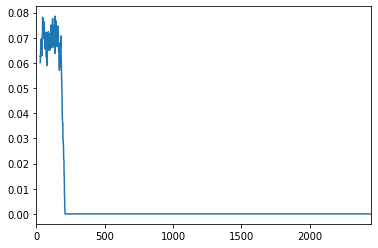

In [35]:
df10['sensor3'].plot()

In [36]:
df10=df10[:750]
df10=df10.fillna(df10.mean())
df10_sensor1=pd.DataFrame(data=df10['sensor3'])
tukey_hinge=df10_sensor1.quantile(0.75)
df10_sensor1['labels']=df10_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df10_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df10_sensor1)-look_back-1):
        a = df10_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df10_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df10_sensor1,look_back=10)
df10_sensor1_final=pd.DataFrame(data=values[0])
df10_sensor1_final['labels']=pd.DataFrame(data=values[1])
df10_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0
1,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0
2,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0
3,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0
4,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0


In [37]:
df11['Date_created']=df11.index
df11=df11.reset_index(drop=True)
df11.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df11.columns)
cols = [cols[-1]] + cols[:-1]
df11 = df11[cols]
df11=df11[abs(df11.sensor1-df11.sensor1.mean()) <= (3*df11.sensor1.std())]
df11=df11[abs(df11.sensor2-df11.sensor2.mean()) <= (3*df11.sensor2.std())]
df11=df11[abs(df11.sensor3-df11.sensor3.mean()) <= (3*df11.sensor3.std())]
df11=df11[abs(df11.sensor4-df11.sensor4.mean()) <= (3*df11.sensor4.std())]
df11=df11.reset_index(drop=True)
df11['Date_created'] = pd.to_datetime(df11['Date_created'], errors='coerce')
df11['day_of_week'] = df11['Date_created'].dt.dayofweek
df11['month'] = pd.DatetimeIndex(df11['Date_created']).month
df11['hour'] = pd.DatetimeIndex(df11['Date_created']).hour
df11[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df11[['sensor1','sensor2','sensor3','sensor4']])
df11['sensor1']=df11['sensor1'].rolling(window=30).var()
df11['sensor2']=df11['sensor2'].rolling(window=30).var()
df11['sensor3']=df11['sensor3'].rolling(window=30).var()
df11['sensor4']=df11['sensor4'].rolling(window=30).var()

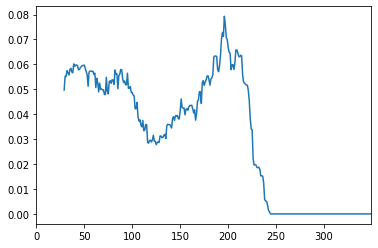

In [38]:
df11['sensor3'][:350].plot()

In [39]:
df11=df11[:250]
df11=df11.fillna(df11.mean())
df11_sensor1=pd.DataFrame(data=df11['sensor3'])
tukey_hinge=df11_sensor1.quantile(0.75)
df11_sensor1['labels']=df11_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df11_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df11_sensor1)-look_back-1):
        a = df11_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df11_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df11_sensor1,look_back=10)
df11_sensor1_final=pd.DataFrame(data=values[0])
df11_sensor1_final['labels']=pd.DataFrame(data=values[1])
df11_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0
1,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0
2,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0
3,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0
4,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0.045103,0


In [40]:
df12['Date_created']=df12.index
df12=df12.reset_index(drop=True)
df12.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df12.columns)
cols = [cols[-1]] + cols[:-1]
df12 = df12[cols]
df12=df12[abs(df12.sensor1-df12.sensor1.mean()) <= (3*df12.sensor1.std())]
df12=df12[abs(df12.sensor2-df12.sensor2.mean()) <= (3*df12.sensor2.std())]
df12=df12[abs(df12.sensor3-df12.sensor3.mean()) <= (3*df12.sensor3.std())]
df12=df12[abs(df12.sensor4-df12.sensor4.mean()) <= (3*df12.sensor4.std())]
df12=df12.reset_index(drop=True)
df12['Date_created'] = pd.to_datetime(df12['Date_created'], errors='coerce')
df12['day_of_week'] = df12['Date_created'].dt.dayofweek
df12['month'] = pd.DatetimeIndex(df12['Date_created']).month
df12['hour'] = pd.DatetimeIndex(df12['Date_created']).hour
df12[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df12[['sensor1','sensor2','sensor3','sensor4']])
df12['sensor1']=df12['sensor1'].rolling(window=30).var()
df12['sensor2']=df12['sensor2'].rolling(window=30).var()
df12['sensor3']=df12['sensor3'].rolling(window=30).var()
df12['sensor4']=df12['sensor4'].rolling(window=30).var()

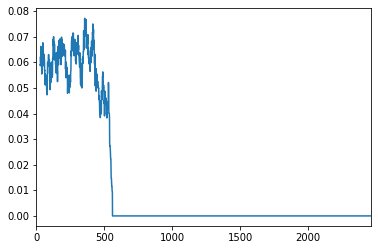

In [41]:
df12['sensor3'].plot()

In [42]:
df12=df12[:600]
df12=df12.fillna(df12.mean())
df12_sensor1=pd.DataFrame(data=df12['sensor3'])
tukey_hinge=df12_sensor1.quantile(0.75)
df12_sensor1['labels']=df12_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df12_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df12_sensor1)-look_back-1):
        a = df12_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df12_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df12_sensor1,look_back=10)
df12_sensor1_final=pd.DataFrame(data=values[0])
df12_sensor1_final['labels']=pd.DataFrame(data=values[1])
df12_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0
1,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0
2,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0
3,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0
4,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0.053268,0


In [43]:
df13['Date_created']=df13.index
df13=df13.reset_index(drop=True)
df13.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df13.columns)
cols = [cols[-1]] + cols[:-1]
df13 = df13[cols]
df13=df13[abs(df13.sensor1-df13.sensor1.mean()) <= (3*df13.sensor1.std())]
df13=df13[abs(df13.sensor2-df13.sensor2.mean()) <= (3*df13.sensor2.std())]
df13=df13[abs(df13.sensor3-df13.sensor3.mean()) <= (3*df13.sensor3.std())]
df13=df13[abs(df13.sensor4-df13.sensor4.mean()) <= (3*df13.sensor4.std())]
df13=df13.reset_index(drop=True)
df13['Date_created'] = pd.to_datetime(df13['Date_created'], errors='coerce')
df13['day_of_week'] = df13['Date_created'].dt.dayofweek
df13['month'] = pd.DatetimeIndex(df13['Date_created']).month
df13['hour'] = pd.DatetimeIndex(df13['Date_created']).hour
df13[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df13[['sensor1','sensor2','sensor3','sensor4']])
df13['sensor1']=df13['sensor1'].rolling(window=30).var()
df13['sensor2']=df13['sensor2'].rolling(window=30).var()
df13['sensor3']=df13['sensor3'].rolling(window=30).var()
df13['sensor4']=df13['sensor4'].rolling(window=30).var()

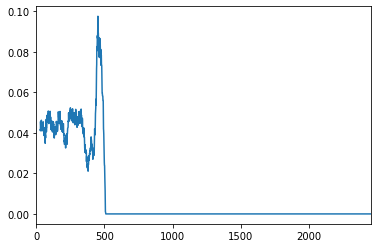

In [44]:
df13['sensor3'].plot()

In [45]:
df13=df13[:500]
df13=df13.fillna(df13.mean())
df13_sensor1=pd.DataFrame(data=df13['sensor3'])
tukey_hinge=df13_sensor1.quantile(0.75)
df13_sensor1['labels']=df13_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df13_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df13_sensor1)-look_back-1):
        a = df13_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df13_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df13_sensor1,look_back=10)
df13_sensor1_final=pd.DataFrame(data=values[0])
df13_sensor1_final['labels']=pd.DataFrame(data=values[1])
df13_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0
1,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0
2,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0
3,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0
4,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0.045635,0


In [46]:
df14['Date_created']=df14.index
df14=df14.reset_index(drop=True)
df14.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df14.columns)
cols = [cols[-1]] + cols[:-1]
df14 = df14[cols]
df14=df14[abs(df14.sensor1-df14.sensor1.mean()) <= (3*df14.sensor1.std())]
df14=df14[abs(df14.sensor2-df14.sensor2.mean()) <= (3*df14.sensor2.std())]
df14=df14[abs(df14.sensor3-df14.sensor3.mean()) <= (3*df14.sensor3.std())]
df14=df14[abs(df14.sensor4-df14.sensor4.mean()) <= (3*df14.sensor4.std())]
df14=df14.reset_index(drop=True)
df14['Date_created'] = pd.to_datetime(df14['Date_created'], errors='coerce')
df14['day_of_week'] = df14['Date_created'].dt.dayofweek
df14['month'] = pd.DatetimeIndex(df14['Date_created']).month
df14['hour'] = pd.DatetimeIndex(df14['Date_created']).hour
df14[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df14[['sensor1','sensor2','sensor3','sensor4']])
df14['sensor1']=df14['sensor1'].rolling(window=30).var()
df14['sensor2']=df14['sensor2'].rolling(window=30).var()
df14['sensor3']=df14['sensor3'].rolling(window=30).var()
df14['sensor4']=df14['sensor4'].rolling(window=30).var()

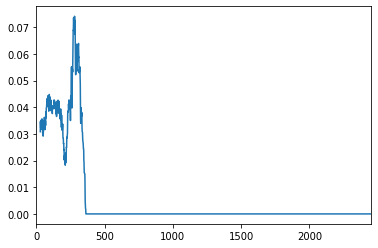

In [47]:
df14['sensor3'].plot()

In [48]:
df14=df14[:500]
df14=df14.fillna(df14.mean())
df14_sensor1=pd.DataFrame(data=df14['sensor3'])
tukey_hinge=df14_sensor1.quantile(0.75)
df14_sensor1['labels']=df14_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df14_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df14_sensor1)-look_back-1):
        a = df14_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df14_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df14_sensor1,look_back=10)
df14_sensor1_final=pd.DataFrame(data=values[0])
df14_sensor1_final['labels']=pd.DataFrame(data=values[1])
df14_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0
1,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0
2,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0
3,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0
4,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0.02792,0


In [49]:
df15['Date_created']=df15.index
df15=df15.reset_index(drop=True)
df15.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df15.columns)
cols = [cols[-1]] + cols[:-1]
df15 = df15[cols]
df15=df15[abs(df15.sensor1-df15.sensor1.mean()) <= (3*df15.sensor1.std())]
df15=df15[abs(df15.sensor2-df15.sensor2.mean()) <= (3*df15.sensor2.std())]
df15=df15[abs(df15.sensor3-df15.sensor3.mean()) <= (3*df15.sensor3.std())]
df15=df15[abs(df15.sensor4-df15.sensor4.mean()) <= (3*df15.sensor4.std())]
df15=df15.reset_index(drop=True)
df15['Date_created'] = pd.to_datetime(df15['Date_created'], errors='coerce')
df15['day_of_week'] = df15['Date_created'].dt.dayofweek
df15['month'] = pd.DatetimeIndex(df15['Date_created']).month
df15['hour'] = pd.DatetimeIndex(df15['Date_created']).hour
df15[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df15[['sensor1','sensor2','sensor3','sensor4']])
df15['sensor1']=df15['sensor1'].rolling(window=30).var()
df15['sensor2']=df15['sensor2'].rolling(window=30).var()
df15['sensor3']=df15['sensor3'].rolling(window=30).var()
df15['sensor4']=df15['sensor4'].rolling(window=30).var()

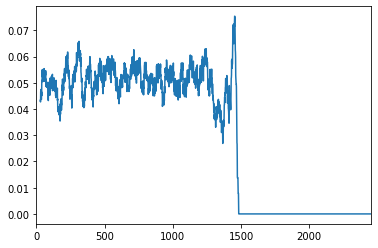

In [50]:
df15['sensor3'].plot()

In [51]:
df15=df15[:1450]
df15=df15.fillna(df15.mean())
df15_sensor1=pd.DataFrame(data=df15['sensor3'])
tukey_hinge=df15_sensor1.quantile(0.75)
df15_sensor1['labels']=df15_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df15_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df15_sensor1)-look_back-1):
        a = df15_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df15_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df15_sensor1,look_back=10)
df15_sensor1_final=pd.DataFrame(data=values[0])
df15_sensor1_final['labels']=pd.DataFrame(data=values[1])
df15_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0
1,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0
2,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0
3,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0
4,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0.05075,0


In [52]:
df16['Date_created']=df16.index
df16=df16.reset_index(drop=True)
df16.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df16.columns)
cols = [cols[-1]] + cols[:-1]
df16 = df16[cols]
df16=df16[abs(df16.sensor1-df16.sensor1.mean()) <= (3*df16.sensor1.std())]
df16=df16[abs(df16.sensor2-df16.sensor2.mean()) <= (3*df16.sensor2.std())]
df16=df16[abs(df16.sensor3-df16.sensor3.mean()) <= (3*df16.sensor3.std())]
df16=df16[abs(df16.sensor4-df16.sensor4.mean()) <= (3*df16.sensor4.std())]
df16=df16.reset_index(drop=True)
df16['Date_created'] = pd.to_datetime(df16['Date_created'], errors='coerce')
df16['day_of_week'] = df16['Date_created'].dt.dayofweek
df16['month'] = pd.DatetimeIndex(df16['Date_created']).month
df16['hour'] = pd.DatetimeIndex(df16['Date_created']).hour
df16[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df16[['sensor1','sensor2','sensor3','sensor4']])
df16['sensor1']=df16['sensor1'].rolling(window=30).var()
df16['sensor2']=df16['sensor2'].rolling(window=30).var()
df16['sensor3']=df16['sensor3'].rolling(window=30).var()
df16['sensor4']=df16['sensor4'].rolling(window=30).var()

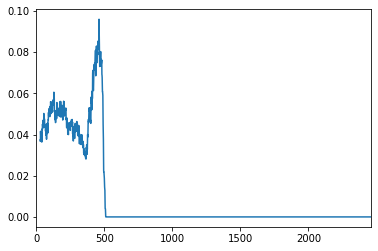

In [53]:
df16['sensor3'].plot()

In [54]:
df16=df16[:500]
df16=df16.fillna(df16.mean())
df16_sensor1=pd.DataFrame(data=df16['sensor3'])
tukey_hinge=df16_sensor1.quantile(0.75)
df16_sensor1['labels']=df16_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df16_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df16_sensor1)-look_back-1):
        a = df16_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df16_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df16_sensor1,look_back=10)
df16_sensor1_final=pd.DataFrame(data=values[0])
df16_sensor1_final['labels']=pd.DataFrame(data=values[1])
df16_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0
1,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0
2,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0
3,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0
4,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0.049889,0


In [55]:
df17['Date_created']=df17.index
df17=df17.reset_index(drop=True)
df17.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df17.columns)
cols = [cols[-1]] + cols[:-1]
df17 = df17[cols]
df17=df17[abs(df17.sensor1-df17.sensor1.mean()) <= (3*df17.sensor1.std())]
df17=df17[abs(df17.sensor2-df17.sensor2.mean()) <= (3*df17.sensor2.std())]
df17=df17[abs(df17.sensor3-df17.sensor3.mean()) <= (3*df17.sensor3.std())]
df17=df17[abs(df17.sensor4-df17.sensor4.mean()) <= (3*df17.sensor4.std())]
df17=df17.reset_index(drop=True)
df17['Date_created'] = pd.to_datetime(df17['Date_created'], errors='coerce')
df17['day_of_week'] = df17['Date_created'].dt.dayofweek
df17['month'] = pd.DatetimeIndex(df17['Date_created']).month
df17['hour'] = pd.DatetimeIndex(df17['Date_created']).hour
df17[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df17[['sensor1','sensor2','sensor3','sensor4']])
df17['sensor1']=df17['sensor1'].rolling(window=30).var()
df17['sensor2']=df17['sensor2'].rolling(window=30).var()
df17['sensor3']=df17['sensor3'].rolling(window=30).var()
df17['sensor4']=df17['sensor4'].rolling(window=30).var()

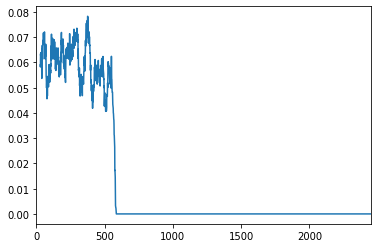

In [56]:
df17['sensor3'].plot()

In [57]:
df17=df17[:550]
df17=df17.fillna(df17.mean())
df17_sensor1=pd.DataFrame(data=df17['sensor3'])
tukey_hinge=df17_sensor1.quantile(0.75)
df17_sensor1['labels']=df17_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df17_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df17_sensor1)-look_back-1):
        a = df17_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df17_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df17_sensor1,look_back=10)
df17_sensor1_final=pd.DataFrame(data=values[0])
df17_sensor1_final['labels']=pd.DataFrame(data=values[1])
df17_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0
1,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0
2,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0
3,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0
4,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0.059883,0


In [58]:
df18['Date_created']=df18.index
df18=df18.reset_index(drop=True)
df18.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df18.columns)
cols = [cols[-1]] + cols[:-1]
df18 = df18[cols]
df18=df18[abs(df18.sensor1-df18.sensor1.mean()) <= (3*df18.sensor1.std())]
df18=df18[abs(df18.sensor2-df18.sensor2.mean()) <= (3*df18.sensor2.std())]
df18=df18[abs(df18.sensor3-df18.sensor3.mean()) <= (3*df18.sensor3.std())]
df18=df18[abs(df18.sensor4-df18.sensor4.mean()) <= (3*df18.sensor4.std())]
df18=df18.reset_index(drop=True)
df18['Date_created'] = pd.to_datetime(df18['Date_created'], errors='coerce')
df18['day_of_week'] = df18['Date_created'].dt.dayofweek
df18['month'] = pd.DatetimeIndex(df18['Date_created']).month
df18['hour'] = pd.DatetimeIndex(df18['Date_created']).hour
df18[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df18[['sensor1','sensor2','sensor3','sensor4']])
df18['sensor1']=df18['sensor1'].rolling(window=30).var()
df18['sensor2']=df18['sensor2'].rolling(window=30).var()
df18['sensor3']=df18['sensor3'].rolling(window=30).var()
df18['sensor4']=df18['sensor4'].rolling(window=30).var()

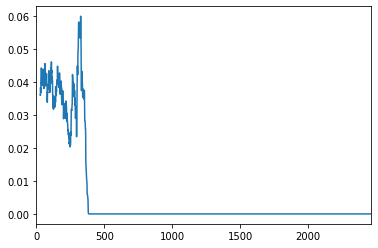

In [59]:
df18['sensor3'].plot()

In [60]:
df18=df18[:450]
df18=df18.fillna(df18.mean())
df18_sensor1=pd.DataFrame(data=df18['sensor3'])
tukey_hinge=df18_sensor1.quantile(0.75)
df18_sensor1['labels']=df18_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df18_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df18_sensor1)-look_back-1):
        a = df18_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df18_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df18_sensor1,look_back=10)
df18_sensor1_final=pd.DataFrame(data=values[0])
df18_sensor1_final['labels']=pd.DataFrame(data=values[1])
df18_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0
1,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0
2,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0
3,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0
4,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0.029974,0


In [61]:
df19['Date_created']=df19.index
df19=df19.reset_index(drop=True)
df19.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df19.columns)
cols = [cols[-1]] + cols[:-1]
df19 = df19[cols]
df19=df19[abs(df19.sensor1-df19.sensor1.mean()) <= (3*df19.sensor1.std())]
df19=df19[abs(df19.sensor2-df19.sensor2.mean()) <= (3*df19.sensor2.std())]
df19=df19[abs(df19.sensor3-df19.sensor3.mean()) <= (3*df19.sensor3.std())]
df19=df19[abs(df19.sensor4-df19.sensor4.mean()) <= (3*df19.sensor4.std())]
df19=df19.reset_index(drop=True)
df19['Date_created'] = pd.to_datetime(df19['Date_created'], errors='coerce')
df19['day_of_week'] = df19['Date_created'].dt.dayofweek
df19['month'] = pd.DatetimeIndex(df19['Date_created']).month
df19['hour'] = pd.DatetimeIndex(df19['Date_created']).hour
df19[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df19[['sensor1','sensor2','sensor3','sensor4']])
df19['sensor1']=df19['sensor1'].rolling(window=30).var()
df19['sensor2']=df19['sensor2'].rolling(window=30).var()
df19['sensor3']=df19['sensor3'].rolling(window=30).var()
df19['sensor4']=df19['sensor4'].rolling(window=30).var()

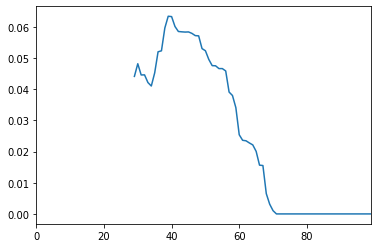

In [62]:
df19['sensor3'][:100].plot()

In [63]:
df19=df19[:70]
df19=df19.fillna(df19.mean())
df19_sensor1=pd.DataFrame(data=df19['sensor3'])
tukey_hinge=df19_sensor1.quantile(0.75)
df19_sensor1['labels']=df19_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df19_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df19_sensor1)-look_back-1):
        a = df19_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df19_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df19_sensor1,look_back=10)
df19_sensor1_final=pd.DataFrame(data=values[0])
df19_sensor1_final['labels']=pd.DataFrame(data=values[1])
df19_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0
1,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0
2,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0
3,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0
4,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0.042593,0


In [64]:
df1['Date_created']=df1.index
df1=df1.reset_index(drop=True)
df1.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df1.columns)
cols = [cols[-1]] + cols[:-1]
df1 = df1[cols]
df1=df1[abs(df1.sensor1-df1.sensor1.mean()) <= (3*df1.sensor1.std())]
df1=df1[abs(df1.sensor2-df1.sensor2.mean()) <= (3*df1.sensor2.std())]
df1=df1[abs(df1.sensor3-df1.sensor3.mean()) <= (3*df1.sensor3.std())]
df1=df1[abs(df1.sensor4-df1.sensor4.mean()) <= (3*df1.sensor4.std())]
df1=df1.reset_index(drop=True)
df1['Date_created'] = pd.to_datetime(df1['Date_created'], errors='coerce')
df1['day_of_week'] = df1['Date_created'].dt.dayofweek
df1['month'] = pd.DatetimeIndex(df1['Date_created']).month
df1['hour'] = pd.DatetimeIndex(df1['Date_created']).hour
df1[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df1[['sensor1','sensor2','sensor3','sensor4']])
df1['sensor1']=df1['sensor1'].rolling(window=30).var()
df1['sensor2']=df1['sensor2'].rolling(window=30).var()
df1['sensor3']=df1['sensor3'].rolling(window=30).var()
df1['sensor4']=df1['sensor4'].rolling(window=30).var()

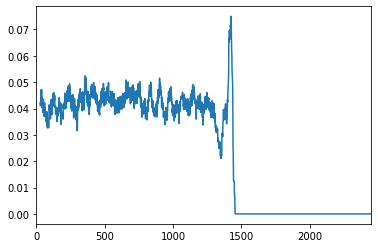

In [65]:
df1['sensor3'].plot()

In [66]:
df1=df1[:1500]
df1=df1.fillna(df1.mean())
df1_sensor1=pd.DataFrame(data=df1['sensor3'])
tukey_hinge=df1_sensor1.quantile(0.75)
df1_sensor1['labels']=df1_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df1_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df1_sensor1)-look_back-1):
        a = df1_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df1_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df1_sensor1,look_back=10)
df1_sensor1_final=pd.DataFrame(data=values[0])
df1_sensor1_final['labels']=pd.DataFrame(data=values[1])
df1_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0
1,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0
2,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0
3,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0
4,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0.040446,0


# Preparing test data

In [67]:
df0['Date_created']=df0.index
df0=df0.reset_index(drop=True)
df0.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)
cols = list(df0.columns)
cols = [cols[-1]] + cols[:-1]
df0 = df0[cols]
df0=df0[abs(df0.sensor1-df0.sensor1.mean()) <= (3*df0.sensor1.std())]
df0=df0[abs(df0.sensor2-df0.sensor2.mean()) <= (3*df0.sensor2.std())]
df0=df0[abs(df0.sensor3-df0.sensor3.mean()) <= (3*df0.sensor3.std())]
df0=df0[abs(df0.sensor4-df0.sensor4.mean()) <= (3*df0.sensor4.std())]
df0=df0.reset_index(drop=True)
df0['Date_created'] = pd.to_datetime(df0['Date_created'], errors='coerce')
df0['day_of_week'] = df0['Date_created'].dt.dayofweek
df0['month'] = pd.DatetimeIndex(df0['Date_created']).month
df0['hour'] = pd.DatetimeIndex(df0['Date_created']).hour
df0[['sensor1','sensor2','sensor3','sensor4']] = minmax_scale(df0[['sensor1','sensor2','sensor3','sensor4']])
df0['sensor1']=df0['sensor1'].rolling(window=30).var()
df0['sensor2']=df0['sensor2'].rolling(window=30).var()
df0['sensor3']=df0['sensor3'].rolling(window=30).var()
df0['sensor4']=df0['sensor4'].rolling(window=30).var()

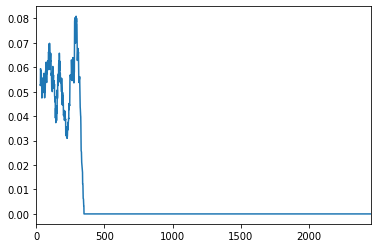

In [68]:
df0['sensor3'].plot()

In [69]:
df0=df0[:400]
df0=df0.fillna(df0.mean())
df0_sensor1=pd.DataFrame(data=df0['sensor3'])
tukey_hinge=df0_sensor1.quantile(0.75)
df0_sensor1['labels']=df0_sensor1.apply(lambda row:1 if row.sensor3>tukey_hinge[0] else 0,axis=1)
def create_dataset(df0_sensor1, look_back=10):
    dataX, dataY = [], []
    for i in range(len(df0_sensor1)-look_back-1):
        a = df0_sensor1['sensor3'][i:(i+look_back)]
        dataX.append(a)
        dataY.append(df0_sensor1['labels'][i + look_back])
    return np.array(dataX), np.array(dataY)
values=create_dataset(df0_sensor1,look_back=10)
df0_sensor1_final=pd.DataFrame(data=values[0])
df0_sensor1_final['labels']=pd.DataFrame(data=values[1])
df0_sensor1_final.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0
1,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0
2,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0
3,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0
4,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0.044417,0


# Generating the data that needs to be sent for LSTM network

In [70]:
def generate_data(lst):
    features = []
    labels = []
    for df in lst:
        f = np.array(df.iloc[:,0:10])
        l = np.array(df.iloc[:,10].astype(int))
        features.append(f)
        labels.append(l)
        feature_output = np.concatenate(features)
    return feature_output.reshape(feature_output.shape[0], feature_output.shape[1], 1), np.concatenate(labels)
        

# Sensor1 values of all the dataframes will be used as trainset

In [71]:
x_train, y_train = generate_data([df1_sensor1_final,df2_sensor1_final,df3_sensor1_final,df4_sensor1_final,df5_sensor1_final,df6_sensor1_final,df7_sensor1_final,df8_sensor1_final,df9_sensor1_final,df10_sensor1_final,df11_sensor1_final,df12_sensor1_final,df13_sensor1_final,df14_sensor1_final,df15_sensor1_final,df16_sensor1_final,df17_sensor1_final,df18_sensor1_final,df19_sensor1_final])

# Model building for LSTM network

In [72]:
model = Sequential()
model.add(LSTM(100, input_shape=(10,1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 41,931
Trainable params: 41,931
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
model_GRU = Sequential()
model_GRU.add(LSTM(100, input_shape=(10,1)))
model_GRU.add(Dense(10, activation='relu'))
model_GRU.add(Dense(10, activation='relu'))
model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(loss='binary_crossentropy', optimizer='adam')
print(model_GRU.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 41,931
Trainable params: 41,931
Non-trainable params: 0
_________________________________________________________________
None


# Fitting the model

In [74]:
model.fit(x_train, y_train, epochs=20)

Train on 12591 samples
Epoch 1/20
12591/12591 [==============================] - 4s 309us/sample - loss: 0.5526
Epoch 2/20
12591/12591 [==============================] - 2s 186us/sample - loss: 0.5035
Epoch 3/20
12591/12591 [==============================] - 2s 185us/sample - loss: 0.4965
Epoch 4/20
12591/12591 [==============================] - 2s 189us/sample - loss: 0.4960
Epoch 5/20
12591/12591 [==============================] - 2s 186us/sample - loss: 0.4957
Epoch 6/20
12591/12591 [==============================] - 2s 186us/sample - loss: 0.4893
Epoch 7/20
12591/12591 [==============================] - 2s 187us/sample - loss: 0.4885
Epoch 8/20
12591/12591 [==============================] - 2s 187us/sample - loss: 0.4885
Epoch 9/20
12591/12591 [==============================] - 2s 187us/sample - loss: 0.4846
Epoch 10/20
12591/12591 [==============================] - 2s 188us/sample - loss: 0.4771
Epoch 11/20
12591/12591 [==============================] - 2s 186us/sample - loss: 0.4

In [75]:
model_GRU.fit(x_train, y_train, epochs=20)

Train on 12591 samples
Epoch 1/20
12591/12591 [==============================] - 4s 355us/sample - loss: 0.6533
Epoch 2/20
12591/12591 [==============================] - 2s 191us/sample - loss: 0.6032
Epoch 3/20
12591/12591 [==============================] - 2s 190us/sample - loss: 0.5798
Epoch 4/20
12591/12591 [==============================] - 3s 200us/sample - loss: 0.5700
Epoch 5/20
12591/12591 [==============================] - 2s 196us/sample - loss: 0.5666
Epoch 6/20
12591/12591 [==============================] - 3s 202us/sample - loss: 0.5655
Epoch 7/20
12591/12591 [==============================] - 2s 195us/sample - loss: 0.5652
Epoch 8/20
12591/12591 [==============================] - 2s 196us/sample - loss: 0.5652
Epoch 9/20
12591/12591 [==============================] - 3s 199us/sample - loss: 0.5651
Epoch 10/20
12591/12591 [==============================] - 3s 200us/sample - loss: 0.5652
Epoch 11/20
12591/12591 [==============================] - 2s 196us/sample - loss: 0.5

# Creating the test_data

In [76]:
test_data,test_label=generate_data([df0_sensor1_final])

# Checking for the accuracy

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [78]:
def predict(model, test_data, test_label):
    pred = model.predict(test_data)
    pred = pred.round()
    try:
        tn, fp, fn, tp = confusion_matrix(pred.flatten(), test_label).ravel()
    except:
        tn = 0
        fp = 0
        fn = 0
        tp = 0
    
    acc = (pred.flatten() == test_label.flatten()).sum()/ len(test_label)  
    pred_conc = np.concatenate([np.zeros(10),pred.flatten()])
    return {
        'pred': pred.flatten(),
        'pred_conc':pred_conc,
        'conf_mat': (tn, fp, fn, tp),
        'acc': acc
    } 

In [79]:
predict_values_LSTM=predict(model,test_data,test_label)

In [80]:
predict_values_GRU=predict(model_GRU,test_data,test_label)

In [81]:
print(predict_values_LSTM)

{'pred': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0

In [82]:
print(predict_values_GRU)

{'pred': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0

# Sensor3 values are little bad than compared to sensor1,sensor2, and sensor4 values